In [ ]:
#@title Load Dependencies
import numpy as np
from numpy import linalg as LA
from scipy import ndimage

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install ipython-autotime
%load_ext autotime
from scipy.optimize import curve_fit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 2.04 ms (started: 2022-07-26 13:28:39 +00:00)


In [ ]:
!pip install SciencePlots
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!sudo apt install fonts-noto-cjk
import matplotlib.pyplot as plt
plt.style.reload_library()
import matplotlib.font_manager as fm
fm._rebuild()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for SciencePlots: filename=SciencePlots-1.0.9-py3-none-any.whl size=6484 sha256=30be68aed71915dce2fa5db8f420fdde73bbd1a73f0e75d4715766cdbe39fbd3
  Stored in directory: /root/.cache/pip/wheels/37/f8/e9/b2f53a40b336388dfc57b108150daff7d6ffbbfc618dba3924
Successfully built SciencePlots
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcup

In [ ]:
plt.style.use('science')

plt.style.use(['science','grid'])
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 28})

time: 2.02 ms (started: 2022-07-26 13:30:44 +00:00)


In [ ]:
Hz100_zoom = pd.read_csv(r'100Hz-zoom.csv',sep=',',header=1)
Hz100_zoomout = pd.read_csv(r'100Hz-zoomout.csv',sep=',',header=1)

Hz250_zoom = pd.read_csv(r'250Hz-zoom.csv',sep=',',header=1)
Hz250_zoomout = pd.read_csv(r'250Hz-zoomout.csv',sep=',',header=1)

Hz400_zoom = pd.read_csv(r'400Hz-zoom.csv',sep=',',header=1)
Hz400_zoomout = pd.read_csv(r'400Hz-zoomout.csv',sep=',',header=1)

laser1 = pd.read_csv(r'laser-experiment.csv',sep=',',header=0)
laser2 = pd.read_csv(r'laser-experiment1.csv',sep=',',header=0)
laser3 = pd.read_csv(r'laser-experiment2.csv',sep=',',header=0)
laser4 = pd.read_csv(r'laser-experiment3.csv',sep=',',header=0)
laser5 = pd.read_csv(r'laser-experiment4.csv',sep=',',header=0)

time: 68.3 ms (started: 2022-07-26 13:30:44 +00:00)


In [ ]:
from scipy import stats


time: 1.84 ms (started: 2022-07-26 13:53:25 +00:00)


In [ ]:
res = stats.linregress(laser4["I"],laser4["Power"])


time: 10.3 ms (started: 2022-07-26 13:54:07 +00:00)


In [ ]:
res

LinregressResult(slope=0.9993432981927711, intercept=-164.3149477911647, rvalue=0.9994381400082616, pvalue=6.052236226313754e-34, stderr=0.007145218031351093, intercept_stderr=2.271535124459021)

time: 9.49 ms (started: 2022-07-26 13:54:10 +00:00)


In [ ]:
164.3149477911647/0.9993432981927711

164.42292462291445

time: 9.78 ms (started: 2022-07-26 14:29:07 +00:00)


In [ ]:
np.sqrt((2.271535124459021/164.3149477911647)**2+(0.007145218031351093/0.9993432981927711)**2)*164.4229246229144

2.55904544616277

time: 13.8 ms (started: 2022-07-26 14:36:03 +00:00)


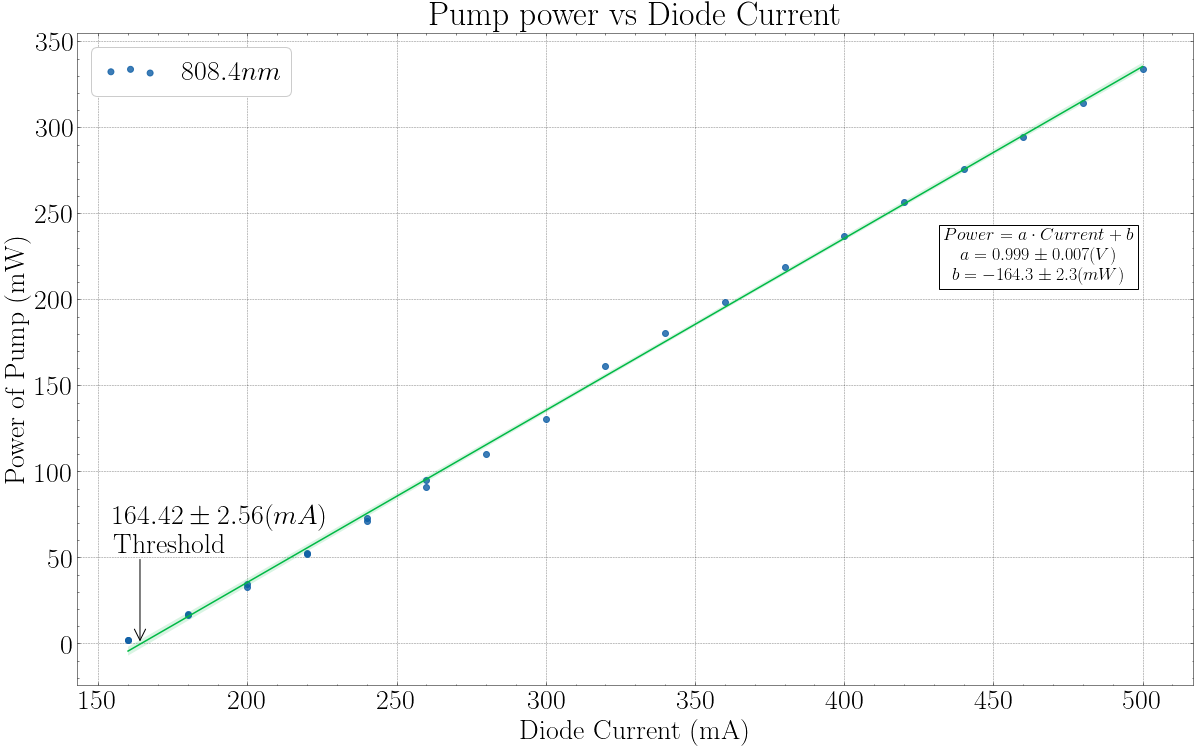

time: 791 ms (started: 2022-07-26 14:41:53 +00:00)


In [ ]:
#sns.scatterplot(data=laser4,x="I",y="Power")

sns.regplot(data=laser4,x="I",y="Power",label=r"$808.4nm$",line_kws={"color": "#00B945"})

t = plt.text(
    465, 225, r"$Power = a\cdot Current+b$"+"\n"+r"$a=0.999 \pm 0.007 (V)$"+"\n"+r"$b=-164.3 \pm 2.3 (mW)$", ha="center", va="center", size=15,fontsize=18,
    bbox=dict(fc="white"))

plt.annotate(r'$164.42 \pm 2.56 (mA) $'+'\nThreshold', xy=(155, 52),  xycoords='data',
            )

plt.annotate("",
            xy=(164, 0), xycoords='data',
            xytext=(164, 50), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.xlabel("Diode Current (mA)")
plt.ylabel("Power of Pump (mW)")
plt.title("Pump power vs Diode Current")
plt.legend(scatterpoints=3)
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(laser4["Power"][:22], laser4["Nd-Yag"][:22])


time: 5.05 ms (started: 2022-07-26 14:48:39 +00:00)


In [ ]:
from scipy import stats
res = stats.linregress(laser4["Power"][:22], laser4["Nd-Yag"][:22])


time: 8.74 ms (started: 2022-07-26 14:49:16 +00:00)


In [ ]:
res

LinregressResult(slope=0.04830721457204189, intercept=-0.3184788347947727, rvalue=0.998622730035501, pvalue=4.405971716292535e-27, stderr=0.0005675060569182485, intercept_stderr=0.10165013406356874)

time: 12.8 ms (started: 2022-07-26 14:49:18 +00:00)


In [ ]:
np.sqrt((0.10165013406356874/0.3184788347947727)**2+(0.0005675060569182485/0.04830721457204189)**2)*6.59

2.1047803371905935

time: 11.3 ms (started: 2022-07-26 14:52:26 +00:00)


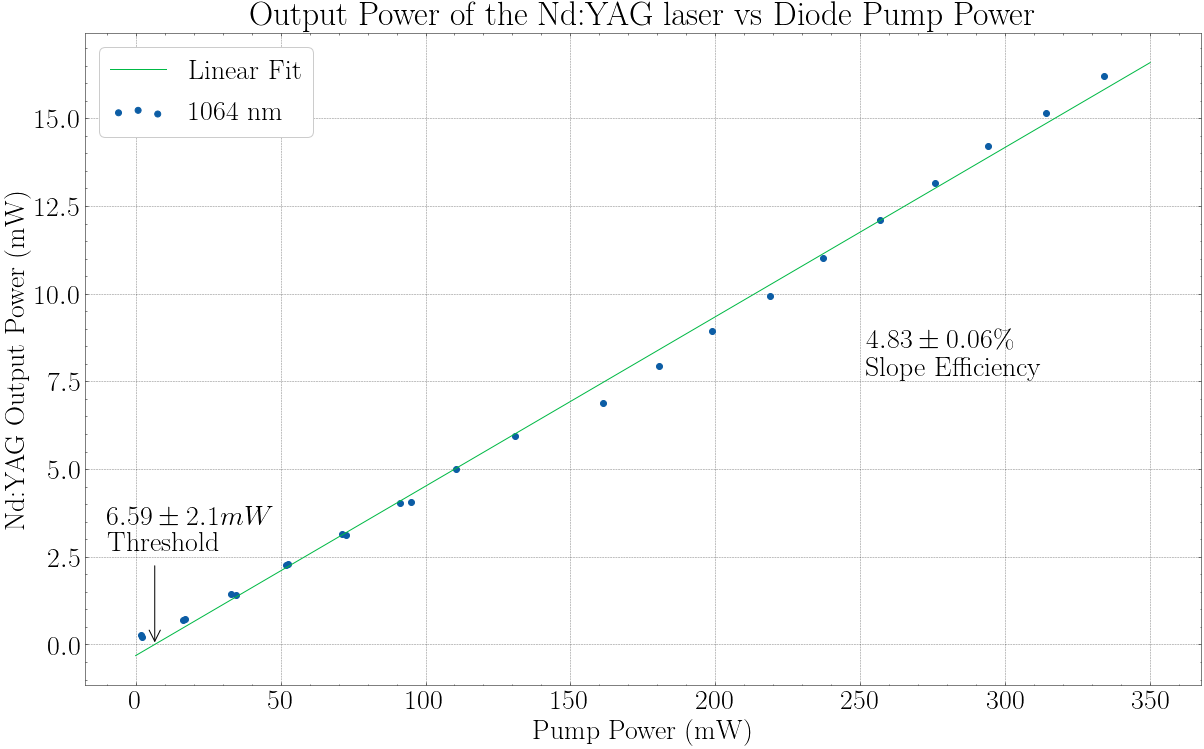

time: 704 ms (started: 2022-07-26 14:57:03 +00:00)


In [ ]:


plt.scatter(laser4["Power"], laser4["Nd-Yag"],label="1064 nm")

x=np.linspace(0,350)
plt.plot(x,slope*x+intercept,color='#00B945',label="Linear Fit")


plt.annotate("",
            xy=(6.59, 0), xycoords='data',
            xytext=(6.59, 2.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'$6.59  \pm 2.1 mW$'+'\n Threshold', xy=(-10, 2.65),  xycoords='data',
            )

plt.annotate(r'$4.83 \pm 0.06\%$'+'\n Slope Efficiency', xy=(252, 7.65),  xycoords='data',
            )

plt.xlabel("Pump Power (mW)")
plt.ylabel("Nd:YAG Output Power (mW)")
plt.title("Output Power of the Nd:YAG laser vs Diode Pump Power")
plt.legend(scatterpoints=3)
plt.show()

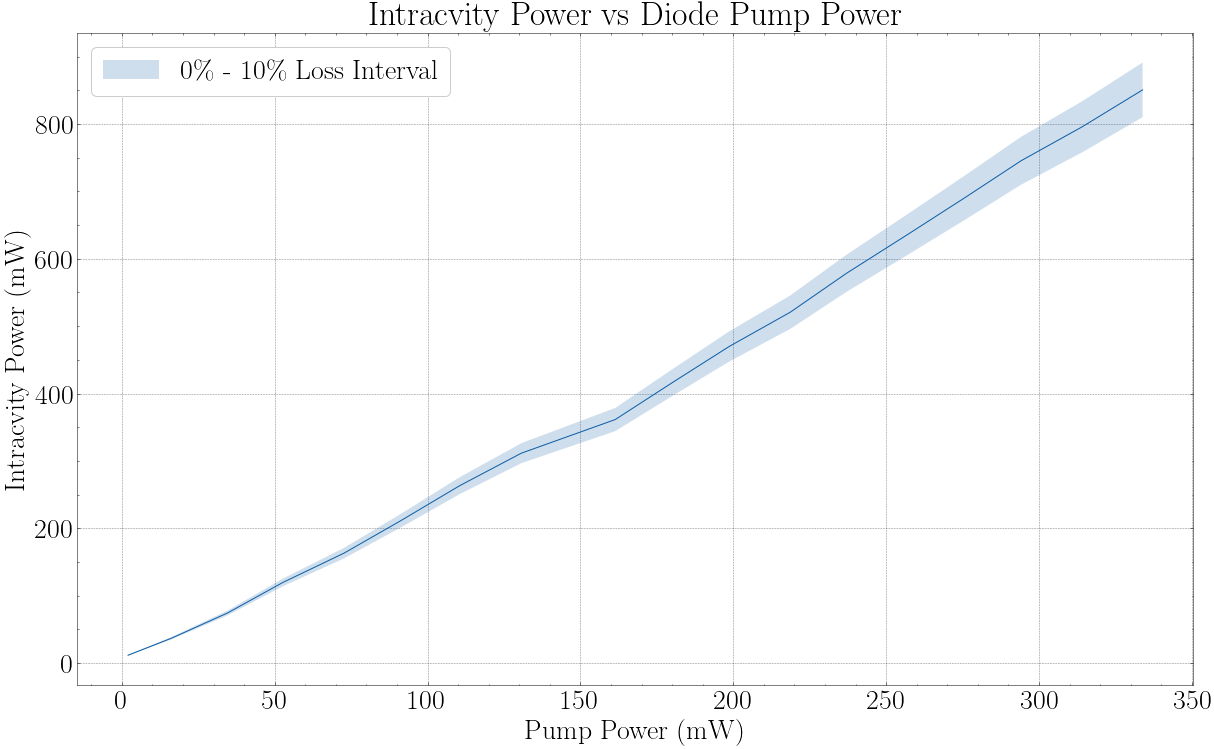

time: 2 s (started: 2022-07-06 10:08:09 +00:00)


In [ ]:


icp_l=laser4["Nd-Yag"][:18]*50
icp_u=laser4["Nd-Yag"][:18]*50*1.1

plt.fill_between(laser4["Power"][:18], icp_l, icp_u,alpha=0.2,label=r"0\% - 10$\%$ Loss Interval")

plt.plot(laser4["Power"][:18],icp_l*1.05)
#plt.plot(laser4["Power"][:18],icp_u)



plt.xlabel("Pump Power (mW)")
plt.ylabel("Intracvity Power (mW)")
plt.title("Intracvity Power vs Diode Pump Power")
plt.legend(scatterpoints=3)
plt.show()

In [ ]:
plt.rcParams['axes.prop_cycle']


'#0C5DA5'
'#00B945'
'#FF9500'
'#FF2C00'
'#845B97'
'#474747'
'#9e9e9e'


time: 11 ms (started: 2022-07-05 16:40:58 +00:00)


In [ ]:
(804-799.8)/0.309

13.592233009708885

time: 8.95 ms (started: 2022-07-26 15:19:30 +00:00)


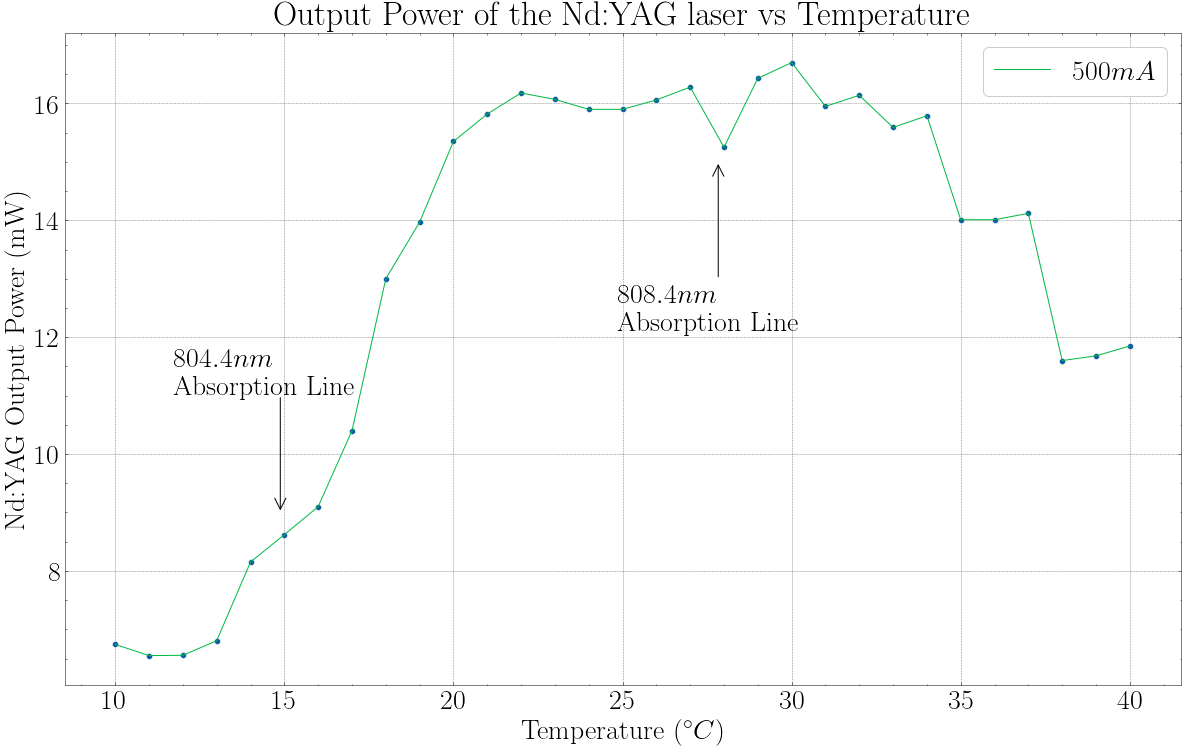

time: 1.02 s (started: 2022-07-26 15:21:44 +00:00)


In [ ]:
sns.scatterplot(data=laser5,x="T",y="Power")
sns.lineplot(data=laser5,x="T",y="Power",label=r"$500mA$",color="#00B945")


plt.annotate("",
            xy=(27.83, 15), xycoords='data',
            xytext=(27.83, 13), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


plt.annotate("",
            xy=(14.88, 9), xycoords='data',
            xytext=(14.88, 11), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )



plt.annotate(r'$804.4nm$'+'\n Absorption Line', xy=(11.7, 11),  xycoords='data',
            )

plt.annotate(r'$808.4nm$'+'\n Absorption Line', xy=(24.83, 12.1),  xycoords='data',
            );


plt.xlabel(r"Temperature ($^\circ C$)")
plt.ylabel("Nd:YAG Output Power (mW)")
plt.title("Output Power of the Nd:YAG laser vs Temperature")
plt.legend(scatterpoints=3)
plt.show()

In [ ]:
laser4

,T,I,Power,Nd-Yag,SH1,SH2
23,32.0,160,1.985,0.2814,0.030,0.00153
17,30.6,160,2.048,0.2240,0.027,0.01180
16,30.5,180,16.300,0.7070,0.234,0.01720
22,31.9,180,16.970,0.7290,0.226,0.01820
21,31.8,200,32.940,1.4290,0.595,0.07200
15,29.4,200,34.520,1.4150,0.650,0.06810
20,31.7,220,51.990,2.2750,1.350,0.19000
14,30.2,220,52.700,2.2810,1.396,0.18000
19,31.6,240,71.290,3.1500,2.114,0.34600
13,30.0,240,72.700,3.1090,2.290,0.28300


time: 39.5 ms (started: 2022-07-05 19:04:46 +00:00)


time: 8.3 ms (started: 2022-07-06 10:12:49 +00:00)


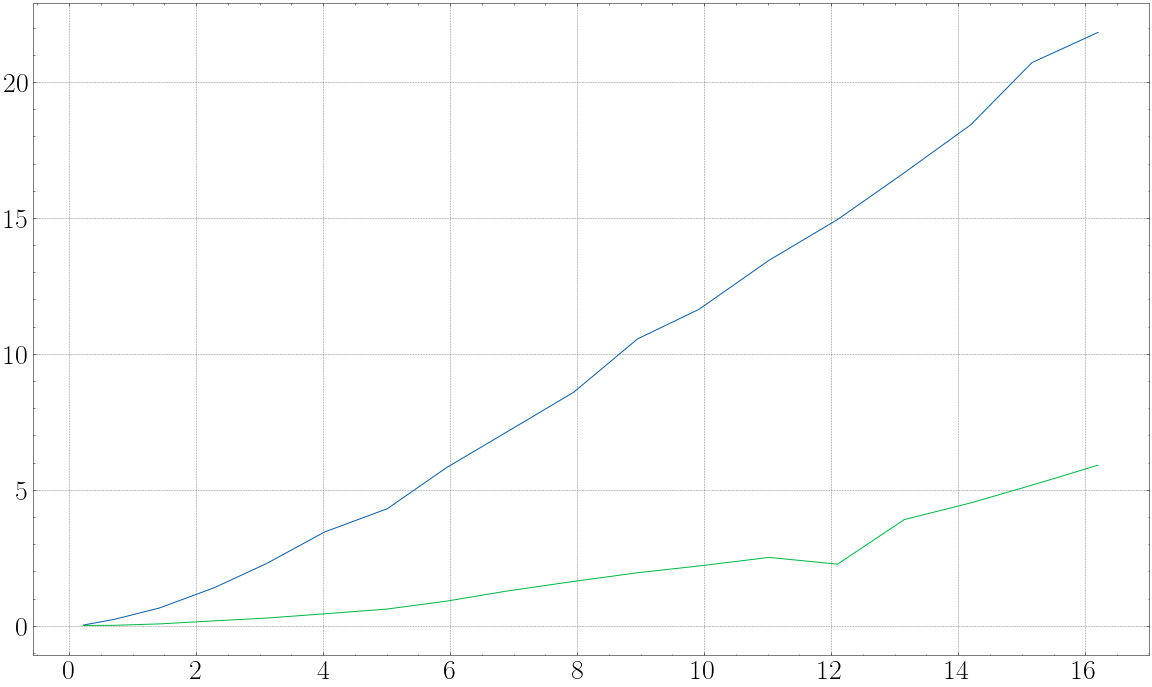

time: 875 ms (started: 2022-07-06 10:50:32 +00:00)


In [ ]:
plt.plot(laser4["Nd-Yag"][:18],laser4["SH1"][:18])
plt.plot(laser4["Nd-Yag"][:18],laser4["SH2"][:18])

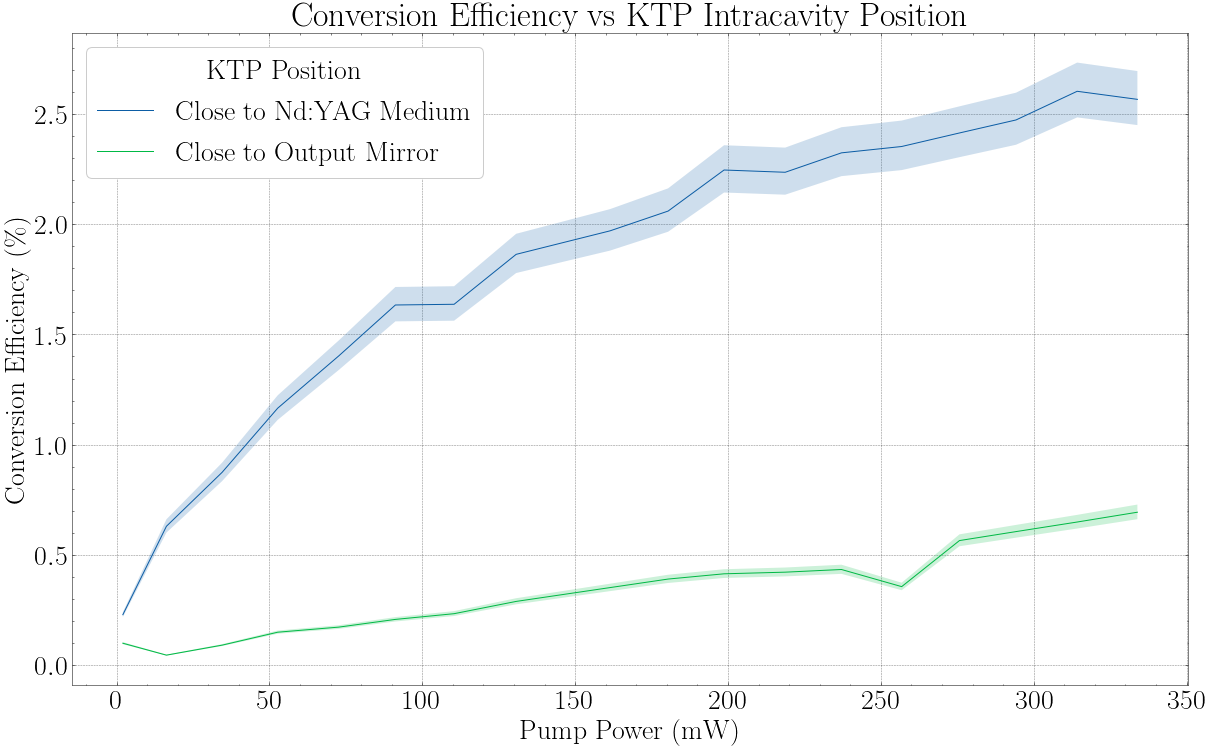

time: 1.54 s (started: 2022-07-06 10:47:24 +00:00)


In [ ]:

#plt.plot(laser4["Power"][:18],laser4["Nd-Yag"][:18]/(laser4["Nd-Yag"][:18]*50*1.05))
plt.plot(laser4["Power"][:18],100*laser4["SH1"][:18]/(laser4["Nd-Yag"][:18]*50*1.05),
            label="Close to Nd:YAG Medium")

plt.fill_between(laser4["Power"][:18],
                 100*laser4["SH1"][:18]/(laser4["Nd-Yag"][:18]*50*1.00),
                 100*laser4["SH1"][:18]/(laser4["Nd-Yag"][:18]*50*1.1),
                 alpha=0.2)


plt.plot(laser4["Power"][:18],100*laser4["SH2"][:18]/(laser4["Nd-Yag"][:18]*50*1.05),
            label="Close to Output Mirror")

plt.fill_between(laser4["Power"][:18],
                 100*laser4["SH2"][:18]/(laser4["Nd-Yag"][:18]*50*1.00),
                 100*laser4["SH2"][:18]/(laser4["Nd-Yag"][:18]*50*1.1),
                 alpha=0.2)


plt.xlabel("Pump Power (mW)")
plt.ylabel(r"Conversion Efficiency (\%)")
plt.title("Conversion Efficiency vs KTP Intracavity Position")
plt.legend(title="KTP Position",scatterpoints=3)
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(laser4[laser4["SH2"]>5]["Power"], laser4[laser4["SH2"]>5]["SH2"])


time: 42 ms (started: 2022-07-07 16:47:45 +00:00)


In [ ]:
res = stats.linregress(laser4[laser4["SH2"]>5]["Power"], laser4[laser4["SH2"]>5]["SH2"])


time: 6.04 ms (started: 2022-07-26 15:22:43 +00:00)


In [ ]:
res

LinregressResult(slope=0.03720812182741117, intercept=-6.5197918781725885, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

time: 9.85 ms (started: 2022-07-26 15:22:44 +00:00)


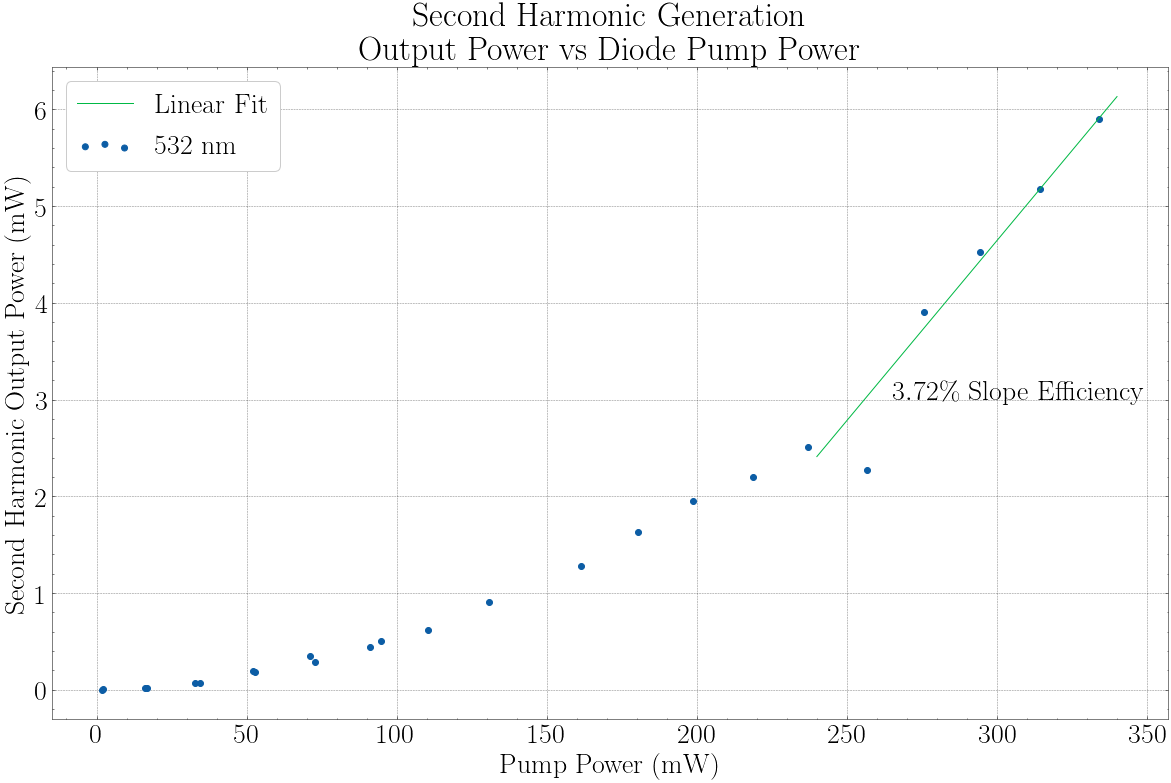

time: 1.21 s (started: 2022-07-07 16:49:18 +00:00)


In [ ]:
plt.style.use(['science','grid'])
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 28})

plt.scatter(laser4["Power"], laser4["SH2"],label="532 nm")

x=np.linspace(240,340)
plt.plot(x,slope*x+intercept,color='#00B945',label="Linear Fit")

'''
plt.annotate("",
            xy=(6.59, 0), xycoords='data',
            xytext=(6.59, 2.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate('6.59 mW \nThreshold', xy=(-10, 2.65),  xycoords='data',
            )
'''
plt.annotate(r'$3.72\%$ Slope Efficiency', xy=(265, 3),  xycoords='data',
            )

plt.xlabel("Pump Power (mW)")
plt.ylabel("Second Harmonic Output Power (mW)")
plt.title("Second Harmonic Generation \nOutput Power vs Diode Pump Power")
plt.legend(scatterpoints=3)
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(laser4[laser4["SH2"]>1]["Power"], laser4[laser4["SH2"]>1]["SH2"])


time: 19.2 ms (started: 2022-07-06 10:12:34 +00:00)


In [ ]:
slope

0.026668886379827027

time: 17.3 ms (started: 2022-07-06 10:12:37 +00:00)


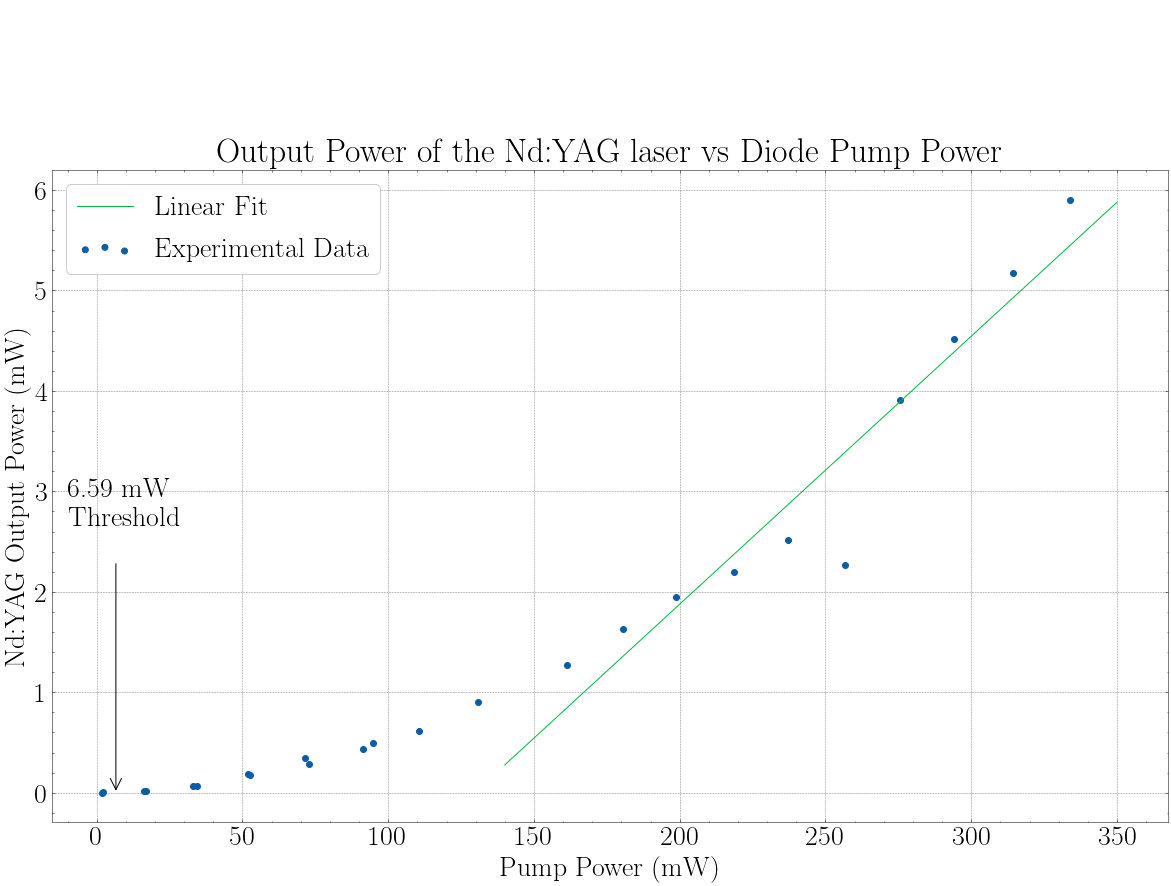

time: 1.52 s (started: 2022-07-05 19:12:16 +00:00)


In [ ]:
plt.style.use(['science','grid'])
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 28})

plt.scatter(laser4["Power"], laser4["SH2"],label="Experimental Data")

x=np.linspace(140,350)
plt.plot(x,slope*x+intercept,color='#00B945',label="Linear Fit")


plt.annotate("",
            xy=(6.59, 0), xycoords='data',
            xytext=(6.59, 2.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate('6.59 mW \nThreshold', xy=(-10, 2.65),  xycoords='data',
            )

plt.annotate(r'$4.83\%$ Slope Efficiency', xy=(252, 7.65),  xycoords='data',
            )

plt.xlabel("Pump Power (mW)")
plt.ylabel("Nd:YAG Output Power (mW)")
plt.title("Output Power of the Nd:YAG laser vs Diode Pump Power")
plt.legend(scatterpoints=3)
plt.show()

In [ ]:
z = np.polyfit(laser4["Nd-Yag"][6:], laser4["SH2"][6:], 2)

time: 3.16 ms (started: 2022-07-07 16:51:13 +00:00)


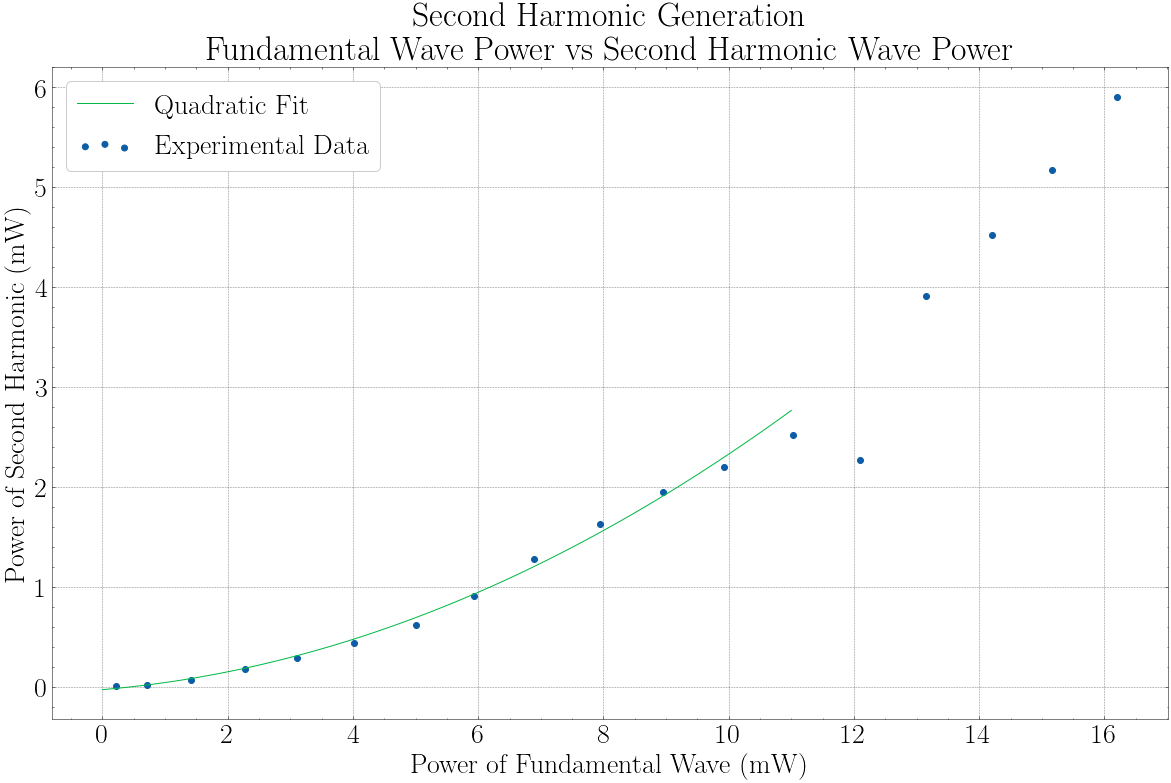

time: 907 ms (started: 2022-07-07 16:51:27 +00:00)


In [ ]:
plt.scatter(laser4["Nd-Yag"][:18], laser4["SH2"][:18],label="Experimental Data")
x=np.linspace(0,11,100)
plt.plot(x,z[0]*x**2+z[1]*x+z[2],label="Quadratic Fit",color= "#00B945")
plt.xlabel("Power of Fundamental Wave (mW)")
plt.ylabel("Power of Second Harmonic (mW)")
plt.title("Second Harmonic Generation \nFundamental Wave Power vs Second Harmonic Wave Power")
plt.legend(scatterpoints=3)
plt.show()

In [ ]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(Hz100_zoomout["(V)"],height=0.2)

np.mean(np.diff((Hz100_zoomout["(ms)"][peaks]).tolist()))

9.66656

time: 61.5 ms (started: 2022-07-05 19:13:56 +00:00)


Text(0.68, 0.89, 'Repetition rate: 103.46 Hz')

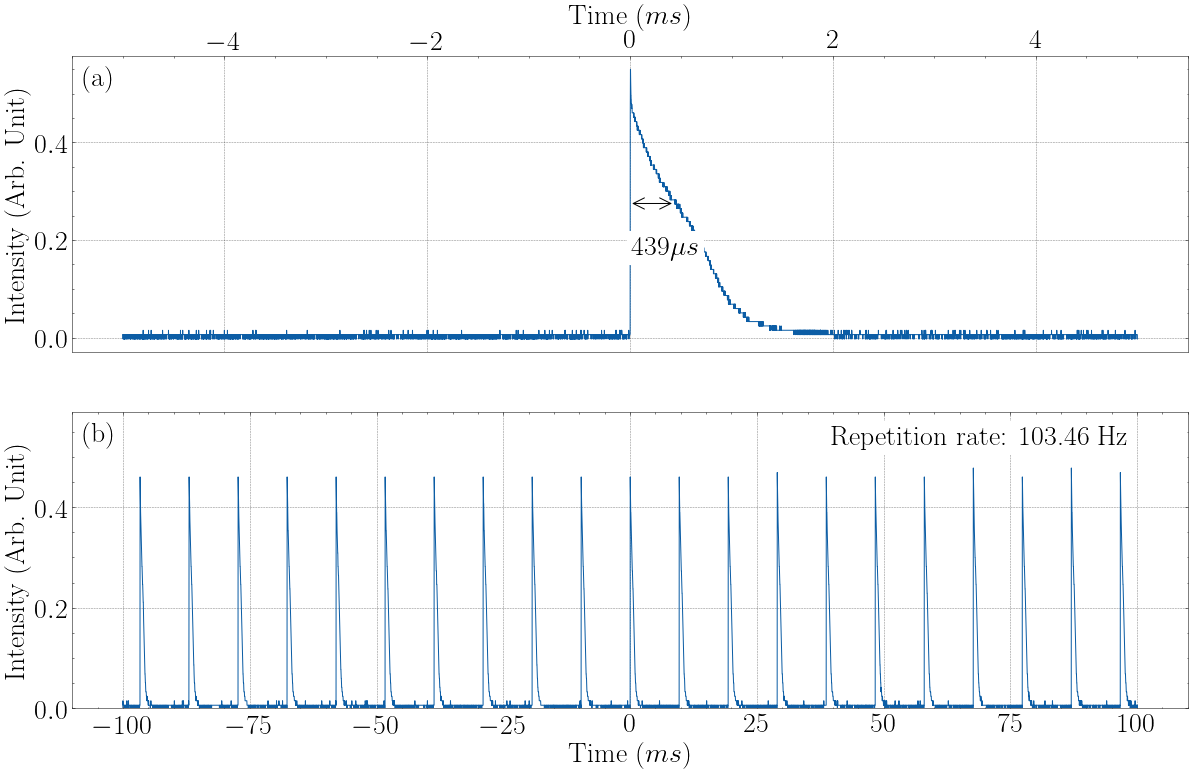

time: 2.52 s (started: 2022-07-05 19:58:48 +00:00)


In [ ]:
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 28})

figure, axis = plt.subplots(2, 1)



axis[0].plot(Hz100_zoom["(ms)"],Hz100_zoom["(V)"])
axis[0].xaxis.set_ticks_position('top')
axis[0].xaxis.set_label_position('top')
axis[0].set_xlabel(r"Time ($ms$)")
axis[0].set_ylabel(r"Intensity (Arb. Unit)")

axis[0].annotate("",
            xy=(0, 0.27468185), xycoords='data',
            xytext=(0.43253720, 0.27468185), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )


axis[0].annotate(r'439$\mu s$', xy=(0.01, 0.17),  xycoords='data',backgroundcolor="w",
            )

axis[0].annotate('(a)', xy=(0.01, 0.9),  xycoords='axes fraction',
            )

axis[1].plot(Hz100_zoomout["(ms)"],Hz100_zoomout["(V)"])
axis[1].set_xlabel(r"Time ($ms$)")
axis[1].set_ylabel(r"Intensity (Arb. Unit)")
axis[1].set_ylim(0,0.59)


axis[1].annotate('(b)', xy=(0.01, 0.9),  xycoords='axes fraction',
            )


axis[1].annotate('Repetition rate: 103.46 Hz', xy=(0.68, 0.89),  xycoords='axes fraction',backgroundcolor="w",
            )

In [ ]:
np.max(Hz250_zoom["(V)"])/2

0.26577045

time: 7.77 ms (started: 2022-07-05 19:56:45 +00:00)


In [ ]:
0.49006

0.49006

time: 12.7 ms (started: 2022-07-05 19:57:43 +00:00)


Text(0.68, 0.89, 'Repetition rate: 262.30 Hz')

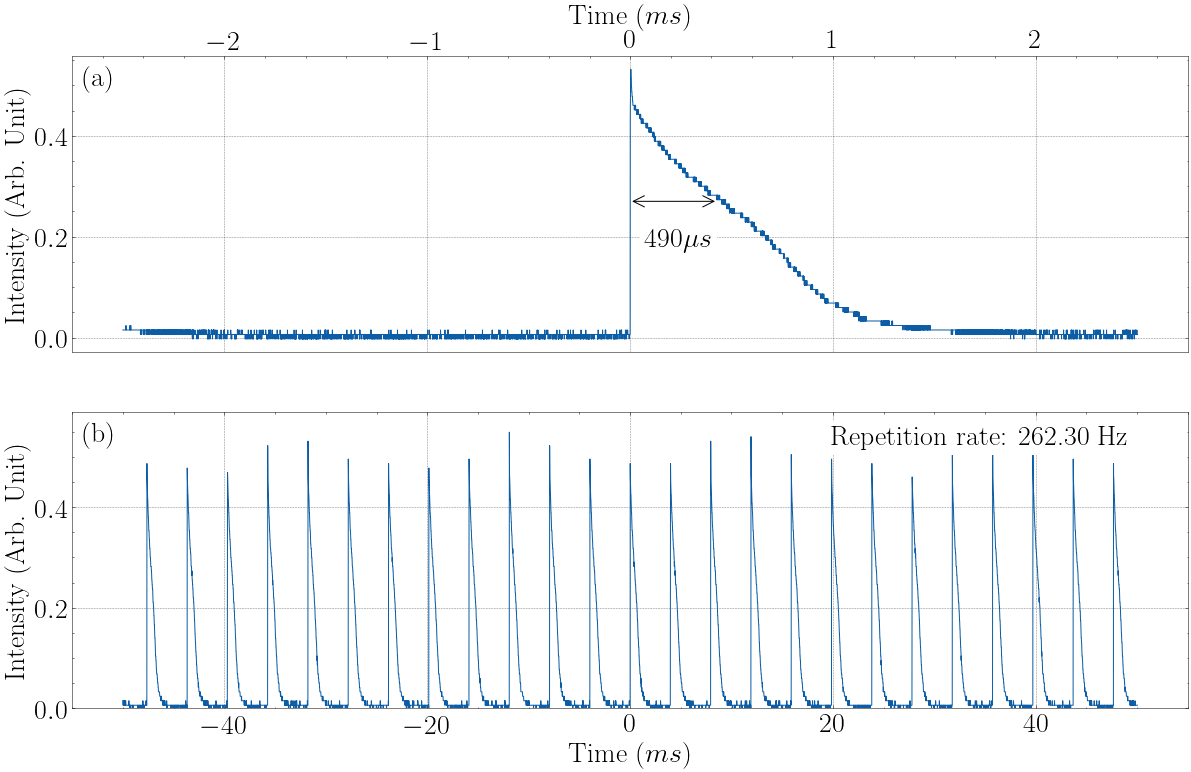

time: 2.05 s (started: 2022-07-05 19:57:53 +00:00)


In [ ]:
figure, axis = plt.subplots(2, 1)



axis[0].plot(Hz250_zoom["(ms)"],Hz250_zoom["(V)"])

axis[0].xaxis.set_ticks_position('top')
axis[0].xaxis.set_label_position('top')
axis[0].set_xlabel(r"Time ($ms$)")
axis[0].set_ylabel(r"Intensity (Arb. Unit)")

axis[0].annotate("",
            xy=(0, 0.270), xycoords='data',
            xytext=(0.4286309, 0.270), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )


axis[0].annotate(r'490$\mu s$', xy=(0.07, 0.18),  xycoords='data',backgroundcolor="w",
            )

axis[0].annotate('(a)', xy=(0.01, 0.9),  xycoords='axes fraction',
            )

axis[1].plot(Hz250_zoomout["(ms)"],Hz250_zoomout["(V)"])
axis[1].set_xlabel(r"Time ($ms$)")
axis[1].set_ylabel(r"Intensity (Arb. Unit)")
axis[1].set_ylim(0,0.59)


axis[1].annotate('(b)', xy=(0.01, 0.9),  xycoords='axes fraction',
            )


axis[1].annotate('Repetition rate: 262.30 Hz', xy=(0.68, 0.89),  xycoords='axes fraction', backgroundcolor="w",
            )

In [ ]:
np.max(Hz400_zoom["(V)"])

0.5404523

time: 20.1 ms (started: 2022-07-05 19:29:52 +00:00)


In [ ]:
0.5404523/2

0.27022615

time: 6.77 ms (started: 2022-07-05 19:30:21 +00:00)


Text(0.68, 0.89, 'Repetition rate: 423.76 Hz')

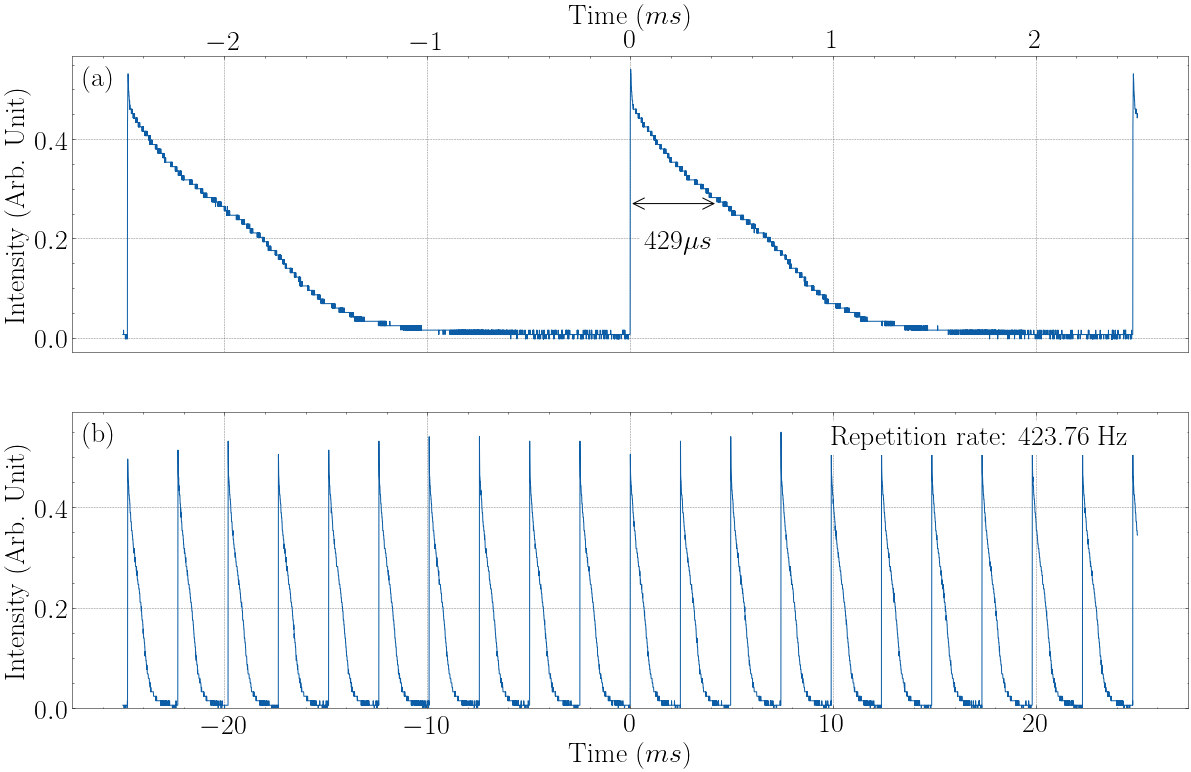

time: 2.65 s (started: 2022-07-05 19:53:25 +00:00)


In [ ]:
figure, axis = plt.subplots(2, 1)



axis[0].plot(Hz400_zoom["(ms)"],Hz400_zoom["(V)"])

axis[0].xaxis.set_ticks_position('top')
axis[0].xaxis.set_label_position('top')
axis[0].set_xlabel(r"Time ($ms$)")
axis[0].set_ylabel(r"Intensity (Arb. Unit)")

axis[0].annotate("",
            xy=(0, 0.270), xycoords='data',
            xytext=(0.4286309, 0.270), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )


axis[0].annotate(r'429$\mu s$', xy=(0.07, 0.18),  xycoords='data',backgroundcolor="w",
            )

axis[0].annotate('(a)', xy=(0.01, 0.9),  xycoords='axes fraction',
            )

axis[1].plot(Hz400_zoomout["(ms)"],Hz400_zoomout["(V)"])
axis[1].set_xlabel(r"Time ($ms$)")
axis[1].set_ylabel(r"Intensity (Arb. Unit)")
axis[1].set_ylim(0,0.59)


axis[1].annotate('(b)', xy=(0.01, 0.9),  xycoords='axes fraction',
            )


axis[1].annotate('Repetition rate: 423.76 Hz', xy=(0.68, 0.89),  xycoords='axes fraction', backgroundcolor="w",
            )

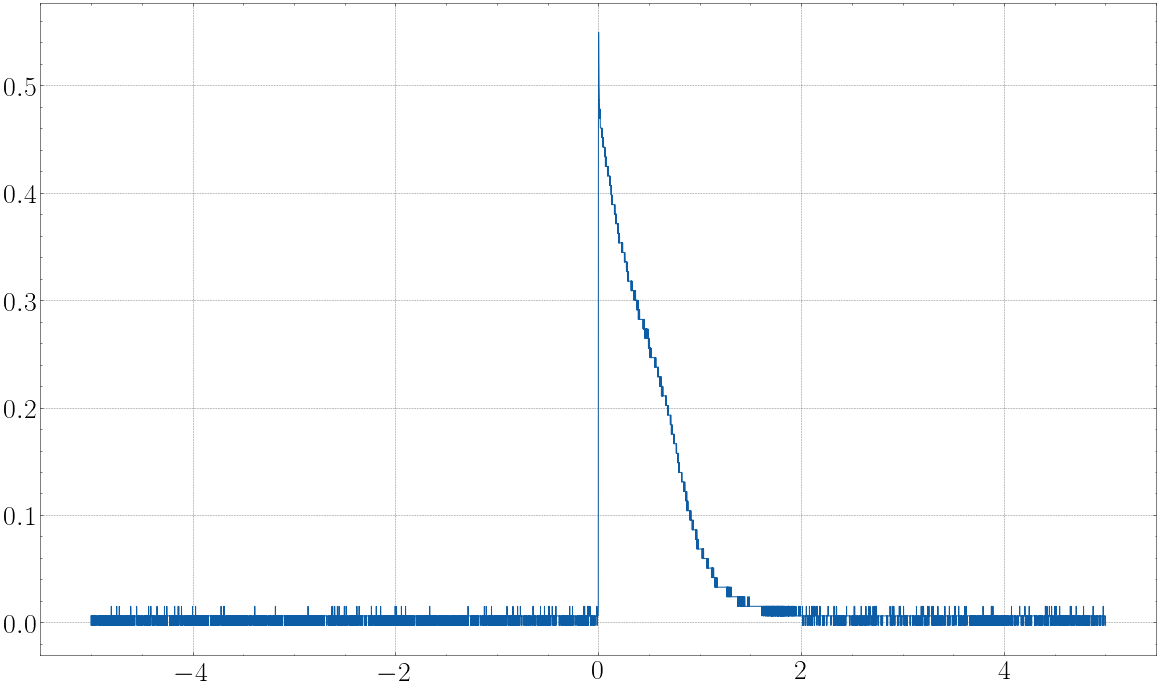

time: 2.56 s (started: 2022-07-05 20:52:56 +00:00)


In [ ]:
plt.plot(Hz100_zoom["(ms)"],Hz100_zoom["(V)"])

In [ ]:
from scipy.signal import savgol_filter
yhat = savgol_filter(Hz100_zoom["(V)"], 51, 3)


time: 58.1 ms (started: 2022-07-05 20:54:31 +00:00)


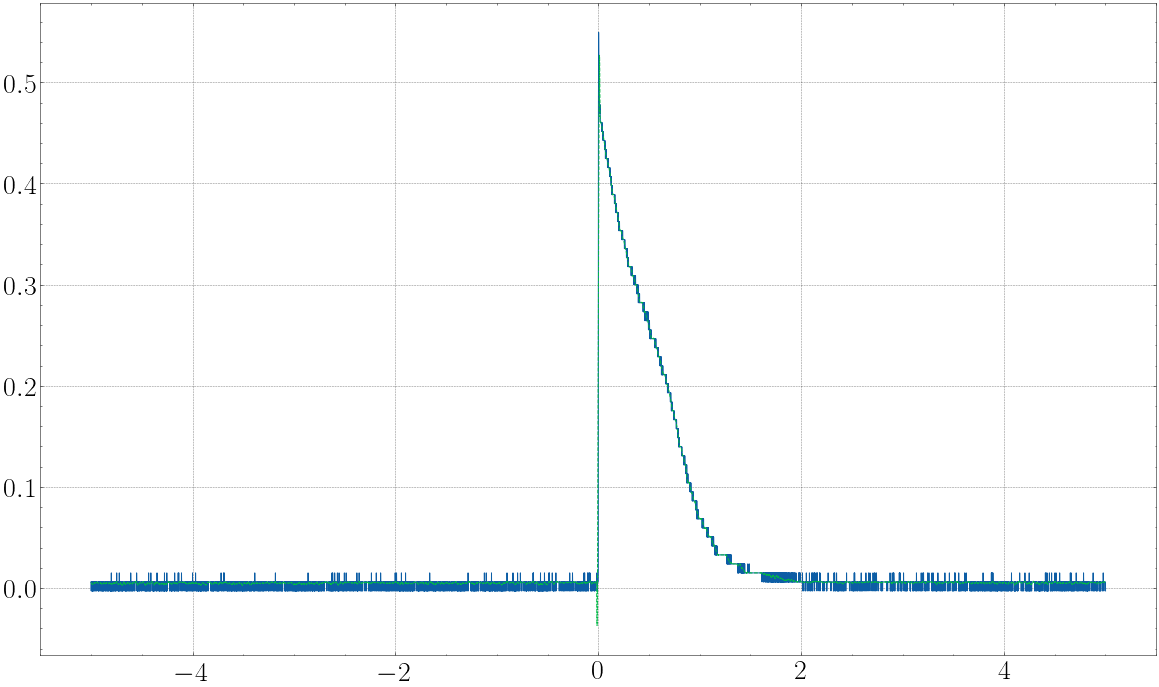

time: 1.45 s (started: 2022-07-05 20:56:32 +00:00)


In [ ]:

plt.plot(Hz100_zoom["(ms)"],Hz100_zoom["(V)"])

plt.plot(Hz100_zoom["(ms)"],yhat,"--")

In [ ]:
0.55*((1/103.46)*46.21)/(0.282*10)

0.08711181763466336

time: 17.1 ms (started: 2022-07-06 12:39:28 +00:00)


In [ ]:
(1/103.46)

0.009665571235260004

time: 14.8 ms (started: 2022-07-06 12:41:45 +00:00)


In [ ]:
np.max(Hz100_zoom["(V)"])

0.5493637

time: 26.9 ms (started: 2022-07-06 12:38:46 +00:00)


In [ ]:
np.trapz(Hz100_zoom["(V)"][7815:10939],Hz100_zoom["(ms)"][7815:10939])

0.28176519339714257

time: 11.6 ms (started: 2022-07-06 12:32:21 +00:00)


In [ ]:
index 1 : 7815
index 2 : 10939

In [ ]:
0.28*au*ms

In [ ]:
181.5*2/0.28

1296.4285714285713

time: 5.22 ms (started: 2022-07-06 11:38:46 +00:00)


In [ ]:
np.max(Hz100_zoom["(V)"])*0.9

0.49442733

time: 27.7 ms (started: 2022-07-06 12:14:49 +00:00)


In [ ]:
np.max(Hz100_zoom["(V)"])*0.1

0.054936370000000005

time: 9.53 ms (started: 2022-07-06 12:14:51 +00:00)


In [ ]:
Hz100_zoom

In [ ]:
(0.00093716-0.00029716)*1000

0.64

time: 19.2 ms (started: 2022-07-06 12:04:44 +00:00)


In [ ]:
1.137577-0.00797716

1.12959984

time: 8.44 ms (started: 2022-07-06 12:06:03 +00:00)


In [ ]:
(0.00141997-0.00013997)*1000

1.2799999999999998

time: 16.4 ms (started: 2022-07-06 12:09:33 +00:00)


In [ ]:
1.01326-0.01133997

1.00192003

time: 5.5 ms (started: 2022-07-06 12:10:05 +00:00)


In [ ]:
(0.00143091-0.00015091)*1000

1.28

time: 15.9 ms (started: 2022-07-06 12:11:15 +00:00)


In [ ]:
1.013911-0.00975091

1.00416009

time: 5.96 ms (started: 2022-07-06 12:13:20 +00:00)


In [ ]:
np.mean([0.64,1.279,1.28])

1.0663333333333334

time: 20.5 ms (started: 2022-07-06 12:14:02 +00:00)


In [ ]:
np.std([0.64,1.279,1.28])

0.30146346747528496

time: 31.7 ms (started: 2022-07-06 12:17:17 +00:00)


In [ ]:
np.mean([1.12959,1.00192,1.0041])

1.0452033333333333

time: 7.59 ms (started: 2022-07-06 12:18:32 +00:00)


In [ ]:
np.std([1.12959,1.00192,1.0041])

0.05967702088930236

time: 8.78 ms (started: 2022-07-06 12:18:36 +00:00)


In [ ]:
np.mean([439,490,429])

452.6666666666667

time: 19.3 ms (started: 2022-07-06 12:19:59 +00:00)


In [ ]:
np.std([439,490,429])

26.71246067953223

time: 18.8 ms (started: 2022-07-06 12:20:19 +00:00)


In [ ]:
np.mean([46210/(103.46),112400/262.30,181500/423.76])

434.4904961947984

time: 24.6 ms (started: 2022-07-06 12:47:03 +00:00)


In [ ]:
46210/(103.46)

446.6460467813648

time: 10.3 ms (started: 2022-07-06 13:40:22 +00:00)


In [ ]:
np.std([46210/(103.46),112400/262.30,181500/423.76])

8.595693667683658

time: 6.73 ms (started: 2022-07-06 12:47:08 +00:00)


0.4283084764961299

time: 15.5 ms (started: 2022-07-06 12:27:57 +00:00)


In [ ]:
1000*46.21/(103.46)

446.6460467813648

time: 19.1 ms (started: 2022-07-06 12:46:27 +00:00)


In [ ]:
1000/(103.46)

9.665571235260005

time: 16.9 ms (started: 2022-07-06 12:46:17 +00:00)


In [ ]:
46210/(103.46)/np.trapz(Hz100_zoom["(V)"][7815:10939],Hz100_zoom["(ms)"][7815:10939])*10**(-3)

1.5851711185342396

time: 8.81 ms (started: 2022-07-06 12:50:11 +00:00)


In [ ]:
112400/262.30/np.trapz(Hz250_zoom["(V)"][7815:10939],Hz250_zoom["(ms)"][7815:10939])*10**(-3)

1.6860068020680987

time: 27.2 ms (started: 2022-07-06 12:50:33 +00:00)


In [ ]:
181500/423.76/np.trapz(Hz400_zoom["(V)"][7815:10939],Hz400_zoom["(ms)"][7815:10939])*10**(-3)

1.6687350897735909

time: 10.8 ms (started: 2022-07-06 12:50:50 +00:00)


In [ ]:
np.mean([1.5851711185342396*np.max([Hz100_zoom["(V)"]]),1.6860068020680987*np.max([Hz250_zoom["(V)"]]),1.6687350897735909*np.max([Hz400_zoom["(V)"]])])

0.8896295870491171

time: 30 ms (started: 2022-07-06 12:52:31 +00:00)


In [ ]:
np.std([1.5851711185342396,1.6860068020680987,1.6687350897735909])

0.044031660842090474

time: 7.25 ms (started: 2022-07-06 12:51:19 +00:00)


In [ ]:
np.max([Hz100_zoom["(V)"]])

0.5493637

time: 14.3 ms (started: 2022-07-06 12:52:15 +00:00)


In [ ]:
1.5851711185342396*np.max([Hz100_zoom["(V)"]])

0.8708354708111085

time: 6.9 ms (started: 2022-07-06 13:39:52 +00:00)


In [ ]:
np.max([Hz100_zoom["(V)"]])

0.5493637

time: 7.91 ms (started: 2022-07-06 13:43:01 +00:00)
